# 🔍 Analyse et Préparation des Données Nettoyées

### 🎯 Objectif
Dans cette étape, nous allons **analyser le jeu de données nettoyé et indexé** pour comprendre ses caractéristiques statistiques et détecter d’éventuelles anomalies.

### 🛠 Ce que nous allons faire
1. 📊 **Afficher un résumé statistique complet** des colonnes numériques pour :
   - Vérifier les valeurs extrêmes ou incohérentes
   - Identifier d’éventuels défauts ou erreurs de capteurs
2. ⚙️ **Préparer le terrain pour la correction** de ces valeurs si nécessaire, afin d’obtenir un jeu de données fiable pour les prochaines analyses.
3. 🔍 **Observer les patterns et distributions** afin de mieux comprendre le comportement du système HMMF et des capteurs associés.

### ✅ Résultat attendu
- Un **aperçu clair** des statistiques principales (moyenne, min, max, écart-type, quartiles).
- La possibilité d’identifier les colonnes et valeurs qui pourraient nécessiter un **pré-traitement ou correction**.
"""))


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates

# Définir le chemin vers votre fichier de données nettoyé et indexé
file_path = 'data_final_cleaned_indexed.csv'

# Charger le fichier CSV. C'est une étape cruciale :
# - index_col=0 : Indique à Pandas que la première colonne du fichier est l'index.
# - parse_dates=True : Indique à Pandas de convertir cet index en format datetime.
try:
    df = pd.read_csv(file_path, index_col=0, parse_dates=True)
    print("Fichier CSV chargé avec succès.")
    print("L'index a été correctement défini comme un DatetimeIndex.")
except FileNotFoundError:
    print(f"Erreur : Le fichier '{file_path}' n'a pas été trouvé. Vérifiez le nom et le chemin.")
    # Si le fichier n'est pas trouvé, on arrête pour éviter des erreurs
    exit()

# Afficher les informations pour vérifier que tout est correct
# Vous devriez voir un 'DatetimeIndex' et aucune valeur nulle.
print("\nInformations sur le DataFrame chargé :")
df.info()

# Afficher les premières lignes pour un aperçu rapide
print("\nAperçu des 5 premières lignes :")
display(df.head())

# =============================================================================
# === VOTRE DEMANDE : AFFICHER LE RÉSUMÉ STATISTIQUE COMPLET ===
# =============================================================================

print("\n" + "="*80)
print("RÉSUMÉ STATISTIQUE DU JEU DE DONNÉES NETTOYÉ")
print("="*80)

# .describe() calcule les statistiques descriptives pour toutes les colonnes numériques.
# .T est utilisé pour transposer le tableau, ce qui le rend beaucoup plus lisible
# quand il y a de nombreuses colonnes comme ici.
summary_stats = df.describe()

# Afficher le résumé
display(summary_stats)

Fichier CSV chargé avec succès.
L'index a été correctement défini comme un DatetimeIndex.

Informations sur le DataFrame chargé :
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 451882 entries, 2024-02-13 11:38:00 to 2024-12-23 06:59:00
Data columns (total 91 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   FIT_003A_Cartridge_outflow                       449002 non-null  float64
 1   FIT_004A_Inlet PX_flow                           449002 non-null  float64
 2   PIT_007A_Discharge_pressure_HP PMP               449002 non-null  float64
 3   PIT_008A_Reject line pressure                    449002 non-null  float64
 4   AIT_005A_PH                                      449002 non-null  float64
 5   AIT_004A_COND                                    449002 non-null  float64
 6   FIT005A_PERMEATE FLOW                            449002 non-null  float64
 7   FIT_003B_

,FIT_003A_Cartridge_outflow,FIT_004A_Inlet PX_flow,PIT_007A_Discharge_pressure_HP PMP,PIT_008A_Reject line pressure,AIT_005A_PH,AIT_004A_COND,FIT005A_PERMEATE FLOW,FIT_003B_Cartridge_outflow,FIT_004B_Inlet PX_flow,PIT_007B_Discharge_pressure_HP PMP,...,PDIT_001H_DIFF PRESSURE ACROSS HMMF-H,FIT_001I_FLOW AT INLET HMMF-I,PDIT_001I_DIFF PRESSURE ACROSS HMMF-I,FIT_001J_FLOW AT INLET HMMF-J,PDIT_001J_DIFF PRESSURE ACROSS HMMF-J,BACKWASH PUMP FLOW,PIT_001 DISCHARGE PRESSURE AT HMMF A-E,PIT_001 DISCHARGE PRESSURE AT HMMF F-J,AIT007_PH at discharge HMMF FEED PUMPS,INTAKE LINE PRESSURE OF HMMF FEED PUMPS
2024-02-13 11:38:00,169.725006,288.075012,63.368752,61.412498,6.52925,351.375000,169.553131,194.324997,283.950012,60.518749,...,0.524625,403.975006,0.666125,352.218750,0.764500,0.000,2.444375,2.370625,7.056875,1.49075
2024-02-13 11:39:00,169.387497,289.237488,63.312500,61.368752,6.52750,352.350006,169.312500,195.037506,285.149994,60.424999,...,0.524000,403.812500,0.665750,350.228119,0.764000,0.225,2.441250,2.369375,7.036750,1.49650
2024-02-13 11:40:00,170.024994,288.975006,63.356251,61.393749,6.52400,352.274994,169.684372,195.187500,284.287506,60.500000,...,0.521875,401.821869,0.664250,349.090637,0.762875,0.075,2.429375,2.360000,7.049875,1.49525
2024-02-13 11:41:00,169.987503,291.187500,63.337502,61.299999,6.52750,352.274994,169.443756,195.262497,284.737488,60.500000,...,0.522500,400.968750,0.663125,348.481262,0.761500,0.075,2.431250,2.364375,7.037625,1.49625
2024-02-13 11:42:00,169.762497,291.862488,63.174999,61.162498,6.53100,351.674988,168.524994,194.362503,284.587494,60.599998,...,0.521500,400.359375,0.664125,347.303131,0.762375,0.000,2.421250,2.358125,7.063875,1.50775



RÉSUMÉ STATISTIQUE DU JEU DE DONNÉES NETTOYÉ


,FIT_003A_Cartridge_outflow,FIT_004A_Inlet PX_flow,PIT_007A_Discharge_pressure_HP PMP,PIT_008A_Reject line pressure,AIT_005A_PH,AIT_004A_COND,FIT005A_PERMEATE FLOW,FIT_003B_Cartridge_outflow,FIT_004B_Inlet PX_flow,PIT_007B_Discharge_pressure_HP PMP,...,PDIT_001H_DIFF PRESSURE ACROSS HMMF-H,FIT_001I_FLOW AT INLET HMMF-I,PDIT_001I_DIFF PRESSURE ACROSS HMMF-I,FIT_001J_FLOW AT INLET HMMF-J,PDIT_001J_DIFF PRESSURE ACROSS HMMF-J,BACKWASH PUMP FLOW,PIT_001 DISCHARGE PRESSURE AT HMMF A-E,PIT_001 DISCHARGE PRESSURE AT HMMF F-J,AIT007_PH at discharge HMMF FEED PUMPS,INTAKE LINE PRESSURE OF HMMF FEED PUMPS
count,449002.000000,449002.000000,449002.000000,449002.000000,449002.000000,449002.000000,449002.000000,449002.000000,449002.000000,449002.000000,...,449002.000000,449002.000000,449002.000000,449002.000000,449002.000000,449002.000000,449002.000000,449002.000000,449002.000000,449002.000000
mean,175.646475,272.314211,53.791843,51.532118,6.197099,549.195466,169.202269,175.951285,277.128255,54.646716,...,0.277526,454.732139,0.325240,454.969601,0.537267,79.524099,2.307849,2.293475,7.314028,1.487575
std,67.523915,100.241660,19.330778,18.750442,1.100720,227.916875,64.229552,62.298058,93.141797,18.267422,...,0.150914,118.023887,0.152513,130.295399,0.613079,174.883722,0.290021,0.296420,0.676917,0.146766
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,179.850006,287.437500,59.256248,56.831249,5.555375,441.825012,175.328125,179.512497,291.825012,59.437500,...,0.194625,442.487488,0.257250,441.390625,0.243000,0.000000,2.240000,2.246250,7.030625,1.493000
50%,204.750000,303.075012,60.981251,58.531250,6.104000,539.849976,195.562500,198.918747,307.125000,60.793751,...,0.257125,479.049988,0.301750,485.103119,0.304875,0.075000,2.313750,2.332500,7.371875,1.502000
75%,210.225006,316.237488,61.837502,59.349998,6.566875,718.275024,202.649994,209.850006,313.912506,61.843750,...,0.335625,508.421875,0.373125,517.643738,0.464250,0.225000,2.418750,2.405625,7.681625,1.510250
max,259.912506,600.000000,72.037498,69.581253,14.000000,1200.000000,350.000000,281.137512,561.037476,68.837502,...,1.748375,650.000000,1.866375,650.000000,2.000000,1062.525024,3.371250,3.408125,8.403500,2.283250


# 🛠 Pré-traitement des Données

### 🎯 Objectif
Créer un **sous-ensemble des colonnes pertinentes** pour le pré-traitement, afin de se concentrer sur les capteurs critiques et les variables les plus importantes du système HMMF.

### ⚙️ Étapes réalisées
1. ✅ Sélection des **colonnes logiques** correspondant aux différents sous-systèmes :
   - Niveau du réservoir
   - Débit et pression différentielle des filtres HMMF (A à J)
   - Système de lavage (backwash)
   - Pressions des pompes HMMF
   - Qualité de l’eau après HMMF
   - Pression ligne d'arrivée
2. 📂 Création d’un **nouveau DataFrame `df_pre_traitement`** contenant uniquement ces colonnes.
3. 💾 Exportation de ce sous-ensemble dans un fichier CSV `pre_data.csv`.
4. 🔍 Vérification du DataFrame et affichage des premières lignes pour confirmer la sélection.

### ✅ Résultat attendu
- Un **jeu de données ciblé** sur les paramètres clés du système HMMF.
- Un fichier CSV propre pour les étapes **d’analyse et de correction des valeurs aberrantes**.
"""))


In [5]:
# 1. Définir les colonnes logiques pour le sous-système de pré-traitement
colonnes_pre_traitement = [
    # Niveau réservoir
    'LIT_002_FILTER_WATER_STG_TNK',

    # Filtres HMMF A-J (débit et pression différentielle)
    'FIT_001A_FLOW AT INLET HMMF-A', 'PDIT_001A_DIFF PRESSURE ACROSS HMMF-A',
    'FIT_001B_FLOW AT INLET HMMF-B', 'PDIT_001B_DIFF PRESSURE ACROSS HMMF-B',
    'FIT_001C_FLOW AT INLET HMMF-C', 'PDIT_001C_DIFF PRESSURE ACROSS HMMF-C',
    'FIT_001D_FLOW AT INLET HMMF-D', 'PDIT_001D_DIFF PRESSURE ACROSS HMMF-D',
    'FIT_001E_FLOW AT INLET HMMF-E', 'PDIT_001E_DIFF PRESSURE ACROSS HMMF-E',
    'FIT_001F_FLOW AT INLET HMMF-F', 'PDIT_001F_DIFF PRESSURE ACROSS HMMF-F',
    'FIT_001G_FLOW AT INLET HMMF-G', 'PDIT_001G_DIFF PRESSURE ACROSS HMMF-G',
    'FIT_001H_FLOW AT INLET HMMF-H', 'PDIT_001H_DIFF PRESSURE ACROSS HMMF-H',
    'FIT_001I_FLOW AT INLET HMMF-I', 'PDIT_001I_DIFF PRESSURE ACROSS HMMF-I',
    'FIT_001J_FLOW AT INLET HMMF-J', 'PDIT_001J_DIFF PRESSURE ACROSS HMMF-J',

    # Système de lavage (backwash)
    'BACKWASH PUMP FLOW',
    'LIT_003 OF HMMF BACKWASH STORAGE TANK',

    # Pressures pompes HMMF
    'PIT_001 DISCHARGE PRESSURE AT HMMF A-E',
    'PIT_001 DISCHARGE PRESSURE AT HMMF F-J',

    # Qualité eau après HMMF
    'AIT007_PH at discharge HMMF FEED PUMPS',

    # Pression ligne d'arrivée
    'INTAKE LINE PRESSURE OF HMMF FEED PUMPS'
]

# 2. Créer le nouveau DataFrame en sélectionnant uniquement ces colonnes
# C'est la syntaxe standard et la plus efficace pour le faire.
df_pre_traitement = df[colonnes_pre_traitement].copy() # .copy() est une bonne pratique pour éviter les SettingWithCopyWarning plus tard

# 3. Sauvegarder ce sous-ensemble dans un nouveau fichier CSV
# 'index=False' est CRUCIAL ici, car vous ne voulez pas sauvegarder l'index
# numérique (0, 1, 2, ...) du DataFrame dans le fichier.
df_pre_traitement.to_csv('pre_data.csv', index=False)

print(f"\n✅ Le sous-ensemble 'pré-traitement' a été exporté avec succès dans 'pre_traitement_data.csv'")

# 4. Afficher les informations pour vérifier que le nouveau DataFrame est correct
print("\nInformations sur le nouveau DataFrame 'df_pre_traitement' :")
df_pre_traitement.info()

# Afficher les premières lignes pour un aperçu
print("\nAperçu des données du pré-traitement :")
display(df_pre_traitement.head())


✅ Le sous-ensemble 'pré-traitement' a été exporté avec succès dans 'pre_traitement_data.csv'

Informations sur le nouveau DataFrame 'df_pre_traitement' :
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 451882 entries, 2024-02-13 11:38:00 to 2024-12-23 06:59:00
Data columns (total 27 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   LIT_002_FILTER_WATER_STG_TNK             449002 non-null  float64
 1   FIT_001A_FLOW AT INLET HMMF-A            449002 non-null  float64
 2   PDIT_001A_DIFF PRESSURE ACROSS HMMF-A    449002 non-null  float64
 3   FIT_001B_FLOW AT INLET HMMF-B            449002 non-null  float64
 4   PDIT_001B_DIFF PRESSURE ACROSS HMMF-B    449002 non-null  float64
 5   FIT_001C_FLOW AT INLET HMMF-C            449002 non-null  float64
 6   PDIT_001C_DIFF PRESSURE ACROSS HMMF-C    449002 non-null  float64
 7   FIT_001D_FLOW AT INLET HMMF-D            449002 non-null

,LIT_002_FILTER_WATER_STG_TNK,FIT_001A_FLOW AT INLET HMMF-A,PDIT_001A_DIFF PRESSURE ACROSS HMMF-A,FIT_001B_FLOW AT INLET HMMF-B,PDIT_001B_DIFF PRESSURE ACROSS HMMF-B,FIT_001C_FLOW AT INLET HMMF-C,PDIT_001C_DIFF PRESSURE ACROSS HMMF-C,FIT_001D_FLOW AT INLET HMMF-D,PDIT_001D_DIFF PRESSURE ACROSS HMMF-D,FIT_001E_FLOW AT INLET HMMF-E,...,FIT_001I_FLOW AT INLET HMMF-I,PDIT_001I_DIFF PRESSURE ACROSS HMMF-I,FIT_001J_FLOW AT INLET HMMF-J,PDIT_001J_DIFF PRESSURE ACROSS HMMF-J,BACKWASH PUMP FLOW,LIT_003 OF HMMF BACKWASH STORAGE TANK,PIT_001 DISCHARGE PRESSURE AT HMMF A-E,PIT_001 DISCHARGE PRESSURE AT HMMF F-J,AIT007_PH at discharge HMMF FEED PUMPS,INTAKE LINE PRESSURE OF HMMF FEED PUMPS
2024-02-13 11:38:00,82.893753,0.0,0.606500,391.059570,0.816500,494.862335,0.660250,388.456238,0.806125,371.231262,...,403.975006,0.666125,352.218750,0.764500,0.000,29.893749,2.444375,2.370625,7.056875,1.49075
2024-02-13 11:39:00,82.375000,0.0,0.607000,388.655182,0.813125,493.031921,0.659125,388.496887,0.803375,369.078125,...,403.812500,0.665750,350.228119,0.764000,0.225,29.981251,2.441250,2.369375,7.036750,1.49650
2024-02-13 11:40:00,81.356247,0.0,0.608625,386.984314,0.810625,493.642059,0.658375,388.984375,0.802875,368.468750,...,401.821869,0.664250,349.090637,0.762875,0.075,30.006250,2.429375,2.360000,7.049875,1.49525
2024-02-13 11:41:00,81.487503,0.0,0.608125,386.413788,0.808875,492.259064,0.655250,386.181244,0.799250,367.981262,...,400.968750,0.663125,348.481262,0.761500,0.075,30.056250,2.431250,2.364375,7.037625,1.49625
2024-02-13 11:42:00,81.237503,0.0,0.611375,387.391846,0.809500,490.632050,0.655875,387.968750,0.799875,370.012512,...,400.359375,0.664125,347.303131,0.762375,0.000,30.075001,2.421250,2.358125,7.063875,1.50775


# 📊 Analyse des Distributions des Variables Numériques

### 🎯 Objectif
Visualiser la **distribution de chaque variable numérique** pour :
- Identifier les valeurs aberrantes ou défauts de capteurs.
- Comprendre la répartition des mesures (symétrique, biaisée, etc.).
- Poser les bases pour d’éventuelles **corrections ou lissages**.

### ⚙️ Étapes réalisées
1. Sélection des **colonnes numériques** du sous-ensemble `df_pre_traitement`.
2. Boucle sur chaque colonne pour générer :
   - Un **histogramme** avec 50 bins.
   - Une **courbe KDE** pour visualiser la densité.
3. Affichage de chaque graphique individuellement pour faciliter l’observation.

### 🔍 Résultat attendu
- Repérer les colonnes présentant des **valeurs aberrantes**.
- Identifier les **tendances générales** dans les données.
- Fournir une base pour la **correction automatique des anomalies de capteurs** dans les étapes suivantes.
"""))


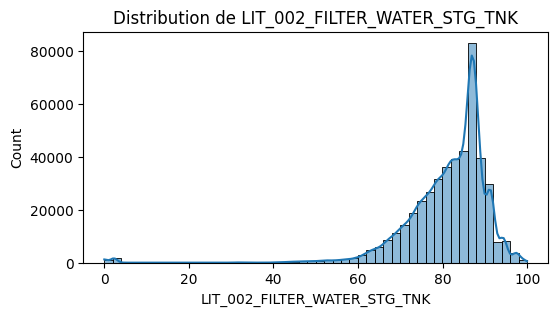

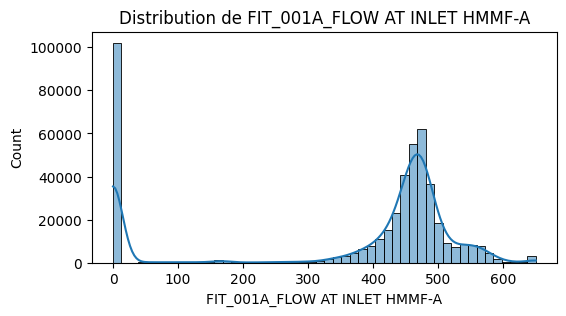

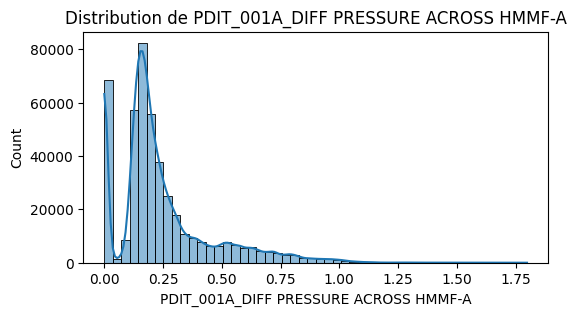

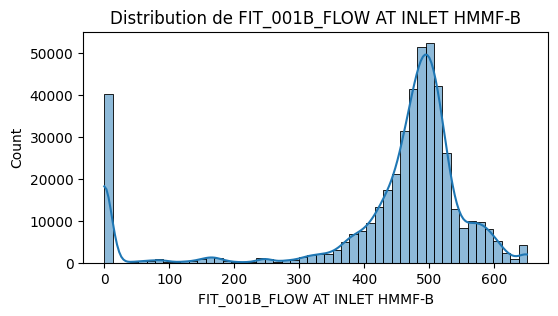

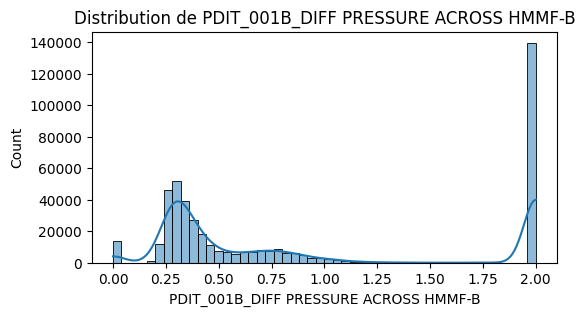

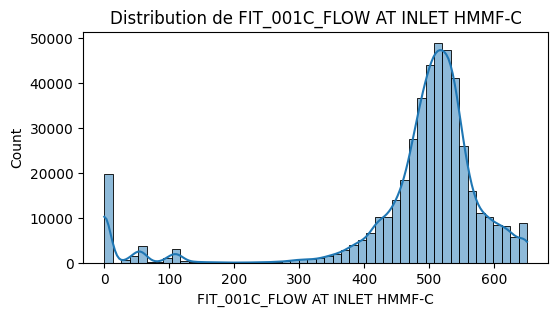

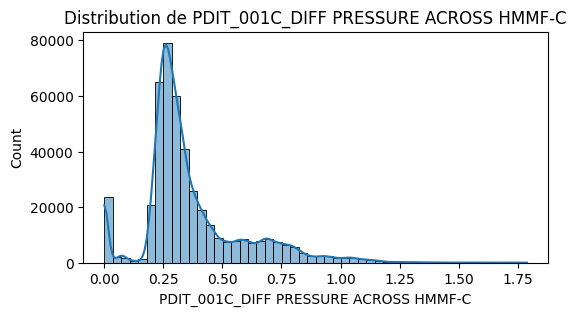

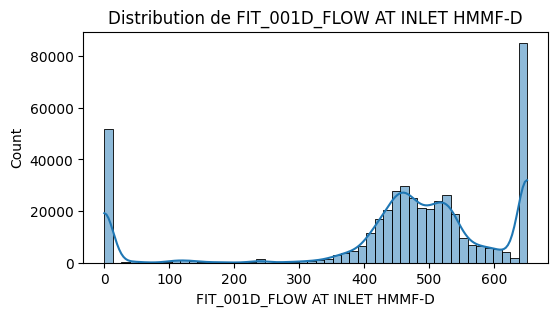

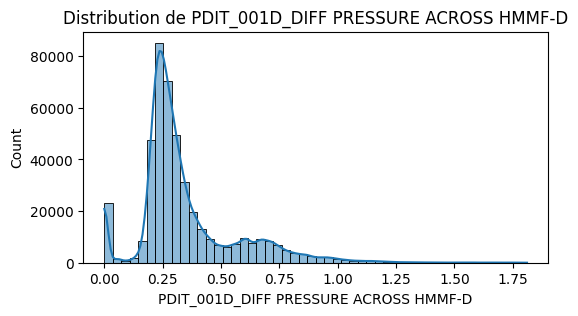

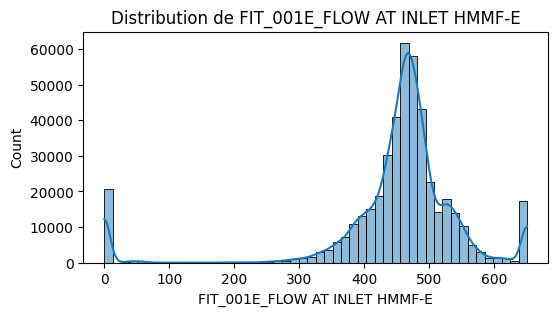

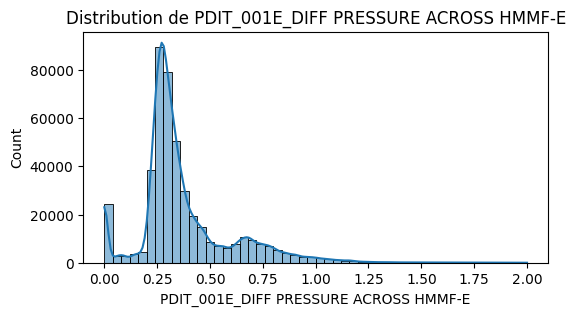

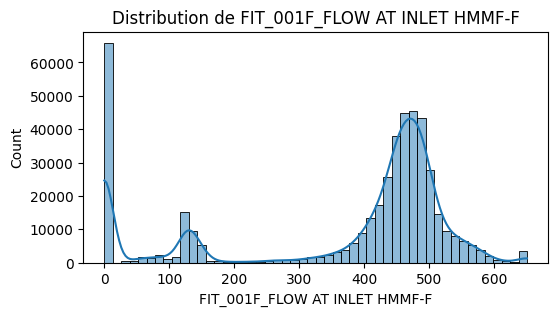

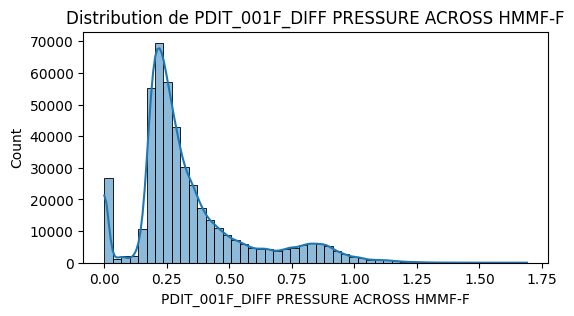

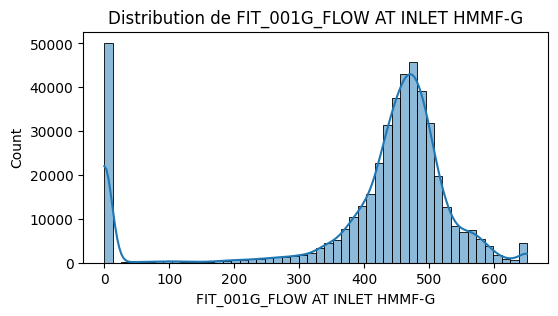

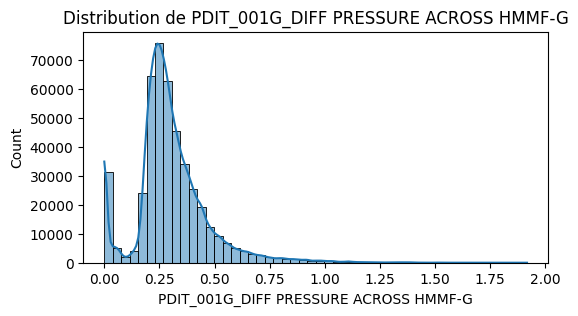

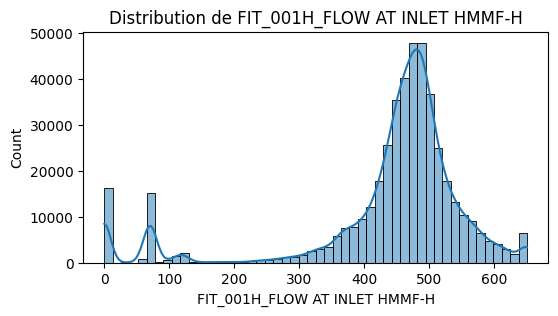

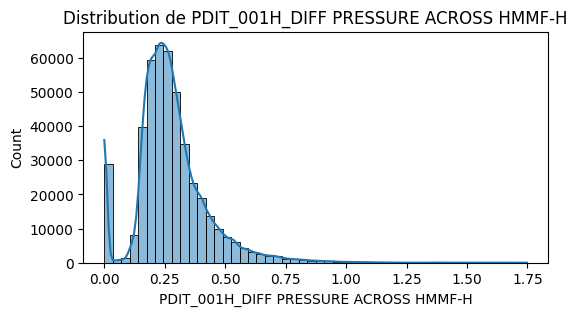

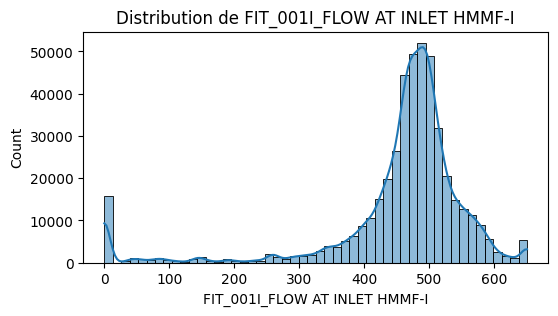

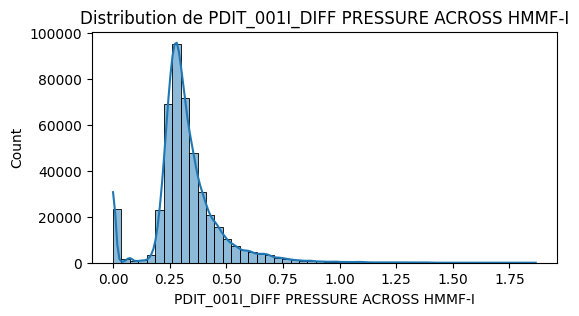

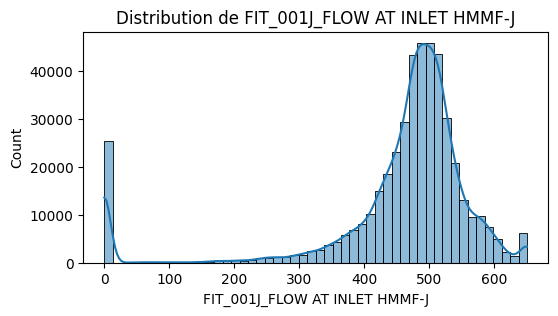

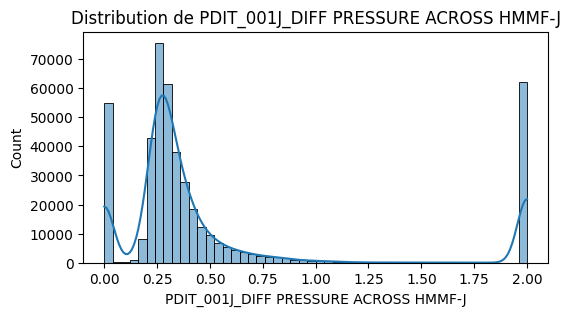

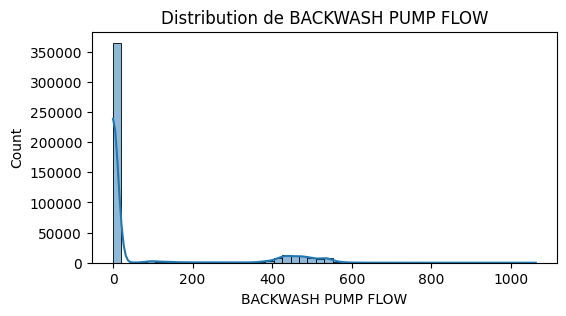

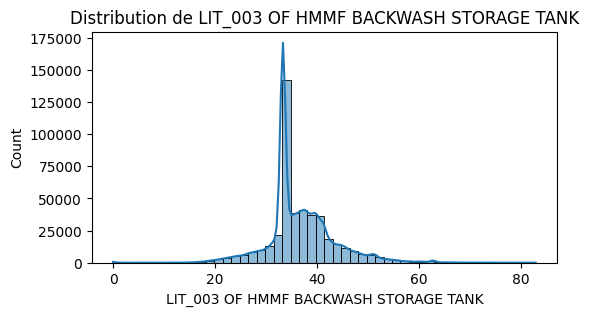

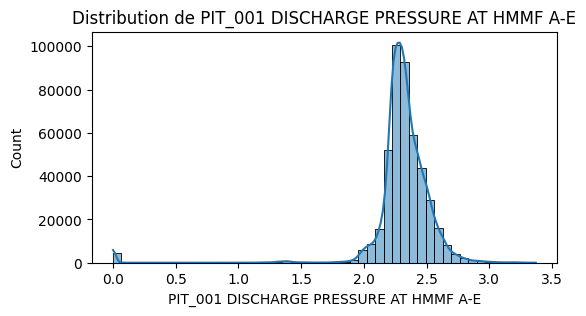

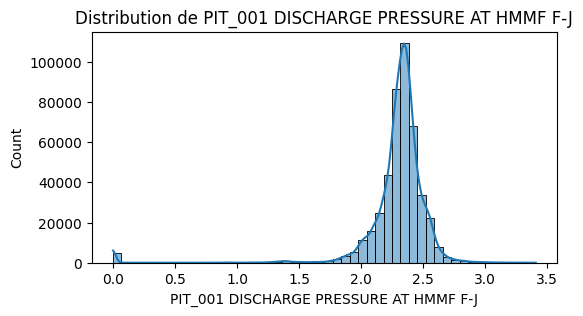

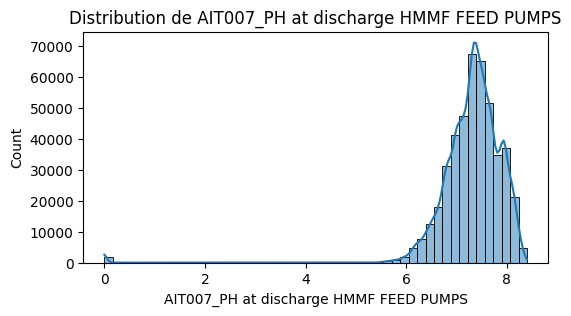

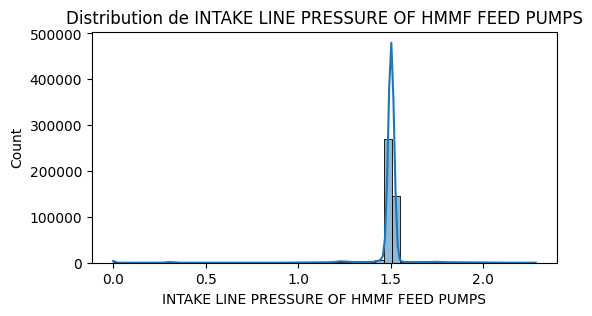

In [6]:
# Sélectionner uniquement les colonnes numériques
numeric_cols = df_pre_traitement.select_dtypes(include=np.number).columns

# Boucle sur les colonnes numériques
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution de {col}')
    plt.show()

# 🛠 Correction des Valeurs Faibles

### 🎯 Objectif
Corriger les valeurs **anormalement faibles** dans la colonne `LIT_002_FILTER_WATER_STG_TNK` afin de :
- Éviter des mesures aberrantes liées à des défauts de capteurs.
- Préparer les données pour un traitement et une analyse plus fiables.

### ⚙️ Méthodologie
1. Définir un **seuil minimal** (`seuil = 20`) en dessous duquel les valeurs seront considérées comme anormales.
2. Identifier les valeurs comprises entre 0 et le seuil.
3. Remplacer ces valeurs par `0`.
4. Vérifier que la correction a été correctement appliquée.

### 🔍 Résultat attendu
- Toutes les valeurs inférieures au seuil sont maintenant égales à `0`.
- La distribution de la colonne est plus cohérente pour les étapes de traitement suivantes.
- Les statistiques de la colonne sont mises à jour pour refléter ces corrections.

"""))


In [29]:
# --- Pré-requis : S'assurer que le DataFrame est bien chargé ---
if 'df_pre_traitement' not in locals():
    print("❌ Erreur : Le DataFrame 'df_pre_traitement' n'est pas défini.")
else:
    # --- Définition de la colonne et du seuil ---
    col_to_correct = 'LIT_002_FILTER_WATER_STG_TNK'
    seuil = 20

    print(f"--- Correction des valeurs faibles pour la colonne '{col_to_correct}' ---")

    # --- 1. Identifier et compter les valeurs à corriger ---

    # Créer un masque booléen : True pour chaque valeur < seuil (et > 0 pour ne pas compter les zéros existants)
    mask = (df_pre_traitement[col_to_correct] < seuil) & (df_pre_traitement[col_to_correct] > 0)

    # Compter combien de valeurs seront affectées
    num_to_correct = mask.sum()

    if num_to_correct > 0:
        print(f"{num_to_correct} valeur(s) comprises entre 0 et {seuil} vont être mises à 0.")

        # --- 2. Appliquer la correction ---

        # Utiliser .loc avec le masque pour ne modifier que les lignes concernées.
        # C'est la méthode la plus sûre et la plus performante.
        df_pre_traitement.loc[mask, col_to_correct] = 0

        print("✅ Correction appliquée avec succès.")

        # --- 3. Vérification ---

        # Vérifier qu'il n'y a plus de valeurs dans l'intervalle ]0, seuil[
        remaining_small_values = ((df_pre_traitement[col_to_correct] < seuil) & (df_pre_traitement[col_to_correct] > 0)).sum()

        if remaining_small_values == 0:
            print(f"✅ Vérification réussie : Il n'y a plus de valeurs entre 0 et {seuil}.")
        else:
            print("⚠️ Erreur : La correction n'a pas fonctionné comme prévu.")

    else:
        print("✅ Aucune valeur à corriger n'a été trouvée.")

# Afficher un aperçu des statistiques de la colonne après correction
print(f"\nStatistiques de '{col_to_correct}' après correction :")
display(df_pre_traitement[col_to_correct].describe())

--- Correction des valeurs faibles pour la colonne 'LIT_002_FILTER_WATER_STG_TNK' ---
85 valeur(s) comprises entre 0 et 20 vont être mises à 0.
✅ Correction appliquée avec succès.
✅ Vérification réussie : Il n'y a plus de valeurs entre 0 et 20.

Statistiques de 'LIT_002_FILTER_WATER_STG_TNK' après correction :


count    449002.000000
mean         81.172091
std          10.666585
min           0.000000
25%          76.900002
50%          83.493752
75%          87.387497
max          99.962502
Name: LIT_002_FILTER_WATER_STG_TNK, dtype: float64

# 📊 Analyse des Séquences de Zéros

### 🎯 Objectif
Identifier et quantifier les **périodes consécutives de zéros** dans les colonnes du sous-ensemble de pré-traitement afin de :
- Détecter les interruptions ou défauts de capteurs.
- Comprendre la durée et la fréquence des anomalies.

### ⚙️ Méthodologie
1. Pour chaque colonne du DataFrame `df_pre_traitement` :
    - Créer une série binaire : 1 si la valeur est zéro, 0 sinon.
    - Détecter les **runs consécutifs de zéros** (run-length encoding).
2. Calculer pour chaque colonne :
    - `zero_runs` : nombre total de séquences de zéros.
    - `median_run_len` : longueur médiane des séquences.
    - `mean_run_len` : longueur moyenne.
    - `std_len` : écart-type des longueurs.
    - `max_run_len` : longueur maximale d'une séquence.

### 🔍 Résultat attendu
- Un DataFrame `run_stats_df` contenant un résumé statistique des séquences de zéros par colonne.
- Permet d’identifier quelles colonnes ont des interruptions fréquentes ou longues.
- Sert de base pour décider des corrections ou imputations à appliquer sur les données.

"""))


In [30]:
cols = [c for c in df_pre_traitement.columns]

def zero_run_stats(series):
    s = (series == 0).astype(int)
    if s.sum() == 0:
        return 0, 0, 0
    # détecter changements (run-length encoding)
    runs = (s != s.shift()).cumsum()
    runs = pd.DataFrame({'val': s, 'run': runs})
    zero_runs = runs[runs['val'] == 1].groupby('run').size()
    return int(zero_runs.count()), int(zero_runs.median()),int(zero_runs.mean()),int(zero_runs.std()),  int(zero_runs.max())

run_stats = []
for col in cols:
    runs, median_len,mean_len, std_len, max_len = zero_run_stats(df_pre_traitement[col])
    run_stats.append({'column': col, 'zero_runs': runs, 'median_run_len': median_len, 'mean_run_len': mean_len, 'std_len': std_len,  'max_run_len': max_len})

run_stats_df = pd.DataFrame(run_stats)

run_stats_df

,column,zero_runs,median_run_len,mean_run_len,std_len,max_run_len
0,LIT_002_FILTER_WATER_STG_TNK,52,2,57,264,1783
1,FIT_001A_FLOW AT INLET HMMF-A,18415,2,4,23,1774
2,PDIT_001A_DIFF PRESSURE ACROSS HMMF-A,7514,3,8,37,1548
3,FIT_001B_FLOW AT INLET HMMF-B,9078,1,2,20,1841
4,PDIT_001B_DIFF PRESSURE ACROSS HMMF-B,424,33,32,46,720
5,FIT_001C_FLOW AT INLET HMMF-C,3413,1,3,31,1820
6,PDIT_001C_DIFF PRESSURE ACROSS HMMF-C,1325,4,16,33,715
7,FIT_001D_FLOW AT INLET HMMF-D,3948,2,11,551,34632
8,PDIT_001D_DIFF PRESSURE ACROSS HMMF-D,555,41,40,83,1639
9,FIT_001E_FLOW AT INLET HMMF-E,3167,2,4,11,315


from IPython.display import Markdown, display

display(Markdown("""
# ⚙️ Correction Automatique des Séquences de Débit Nulles

### 🎯 Objectif
- Identifier les **séquences de zéros** dans les colonnes de débit (`FIT_001*`) là où les pressions (`PDIT_001*`) indiquent qu'un débit devrait exister.
- Corriger ces valeurs pour refléter des conditions réalistes et cohérentes avec le contexte.

### 🛠 Méthodologie
1. **Seuil initial** : Toute valeur de débit inférieure à 50 est mise à zéro.
2. **Détection des séquences incohérentes** :
    - Séquences où le débit = 0 et la pression ≠ 0.
    - Calcul des valeurs avant et après chaque séquence pour estimer le contexte.
3. **Filtrage statistique** :
    - Seules les séquences dont la pression moyenne de contexte est dans l’intervalle [Q1, Q3] sont retenues.
4. **Correction des séquences** :
    - Remplacement des zéros par la moyenne des valeurs avant et après la séquence.
    - Vérification que les valeurs de remplacement sont proches de la moyenne globale ± écart-type.
5. **Boucle While** :
    - Répétition jusqu’à convergence (aucune correction supplémentaire) ou jusqu’à 10 passes maximum.

### 🔍 Résultat attendu
- `df_corrected` contient désormais des débits corrigés.
- Les anomalies temporaires des capteurs sont réduites.
- La boucle while garantit une **correction progressive et sécurisée** des séquences problématiques.

💡 Cette étape est cruciale pour préparer le jeu de données à une analyse fiable et éviter que les zéros artificiels faussent les résultats.
"""))


In [31]:
if 'df_pre_traitement' not in locals():
    print("❌ Erreur : Le DataFrame 'df_pre_traitement' n'est pas défini. Veuillez l'exécuter.")
else:
    df_corrected = df_pre_traitement.copy()
    # =========================================================================
    # === TRANSFORMATION DE LA BOUCLE FOR EN BOUCLE WHILE ===
    # =========================================================================

    pass_num = 0
    max_passes = 10  # Une sécurité pour éviter une boucle infinie

    # La boucle s'exécutera indéfiniment jusqu'à ce qu'on la quitte avec un 'break'
    while True:
        pass_num += 1
        print(f"\n=== Passe {pass_num} ===")

        # --- 1️⃣ Appliquer le seuil de débit ---
        seuil = 50
        flow_cols = sorted([col for col in df_corrected.columns if col.startswith('FIT_001')])
        dp_cols   = sorted([col for col in df_corrected.columns if col.startswith('PDIT_001')])

        for flow_col in flow_cols:
            df_corrected[flow_col] = df_corrected[flow_col].apply(lambda x: 0 if x < seuil else x)

        # --- 2️⃣ Détection des séquences incohérentes ---
        sequences_filtered_dict = {}
        for flow_col, dp_col in zip(flow_cols, dp_cols):
            mask_flow_zero_dp_nonzero = (df_corrected[flow_col] == 0) & (df_corrected[dp_col] > 0.01)

            if not mask_flow_zero_dp_nonzero.any():
                sequences_filtered_dict[flow_col] = pd.DataFrame()
                continue

            runs = (mask_flow_zero_dp_nonzero != mask_flow_zero_dp_nonzero.shift()).cumsum()
            df_corrected['run'] = runs
            df_sequences_mask = df_corrected[mask_flow_zero_dp_nonzero]

            val_before, val_after, dp_moyenne = [], [], []
            grouped_sequences = df_sequences_mask.groupby('run')

            for run_id, group in grouped_sequences:
                idxs = group.index
                pos_start = df_corrected.index.get_loc(idxs[0])
                pos_end   = df_corrected.index.get_loc(idxs[-1])

                val_before.append(df_corrected.iloc[pos_start-1][flow_col] if pos_start > 0 else np.nan)
                val_after.append(df_corrected.iloc[pos_end+1][flow_col] if pos_end+1 < len(df_corrected) else np.nan)

                dp_val_before = df_corrected.iloc[pos_start-1][dp_col] if pos_start > 0 else np.nan
                dp_val_after  = df_corrected.iloc[pos_end+1][dp_col] if pos_end+1 < len(df_corrected) else np.nan
                dp_moyenne.append(np.nanmean([dp_val_before, dp_val_after]))

            temp_df = df_sequences_mask.reset_index().rename(columns={'index': 'time'})
            df_agg = temp_df.groupby('run').agg(
                start_time=('time', 'min'),
                end_time=('time', 'max'),
                duree_min=('time', 'size')
            )
            df_sequences = pd.DataFrame({
                'start_time': df_agg['start_time'],
                'end_time': df_agg['end_time'],
                'duree_min': df_agg['duree_min'],
                'FIT_avant': val_before,
                'FIT_apres': val_after,
                'dp_moyenne_contexte': dp_moyenne
            })

            df_sequences.dropna(subset=['dp_moyenne_contexte', 'FIT_avant', 'FIT_apres'], inplace=True)
            if df_sequences.empty:
                sequences_filtered_dict[flow_col] = pd.DataFrame()
                continue

            q1, q3 = df_sequences['dp_moyenne_contexte'].quantile([0.25, 0.75])
            df_sequences_filtered = df_sequences[
                (df_sequences['dp_moyenne_contexte'] >= q1) &
                (df_sequences['dp_moyenne_contexte'] <= q3)
            ].reset_index(drop=True)

            sequences_filtered_dict[flow_col] = df_sequences_filtered

        # --- 3️⃣ Correction des Flow = 0 ---
        corrections_total = 0
        global_means = df_corrected[flow_cols].mean()

        for flow_col in flow_cols:
            df_sequences_filtered_hmmf = sequences_filtered_dict.get(flow_col)
            if df_sequences_filtered_hmmf is None or df_sequences_filtered_hmmf.empty: continue

            flow_mean = global_means[flow_col]
            flow_std  = df_corrected[flow_col].std()

            for i, row in df_sequences_filtered_hmmf.iterrows():
                avant = row['FIT_avant']
                apres = row['FIT_apres']

                if (flow_mean - flow_std <= avant <= flow_mean + flow_std) and \
                   (flow_mean - flow_std <= apres <= flow_mean + flow_std):

                    remplacement = (avant + apres) / 2
                    mask_run = (df_corrected.index >= row['start_time']) & \
                               (df_corrected.index <= row['end_time'])

                    num_corrected_in_seq = (df_corrected.loc[mask_run, flow_col] == 0).sum()
                    if num_corrected_in_seq > 0:
                        corrections_total += 1
                        df_corrected.loc[mask_run, flow_col] = remplacement

        df_corrected.drop(columns=['run'], inplace=True, errors='ignore')
        print(f"Total de séquences corrigées dans cette passe : {corrections_total}")

        # --- Condition de sortie de la boucle ---
        if corrections_total == 0:
            print("\nAucune correction supplémentaire appliquée. Convergence atteinte, fin des passes.")
            break

        if pass_num >= max_passes:
            print(f"\nNombre maximal de {max_passes} passes atteint. Arrêt de la boucle.")
            break


=== Passe 1 ===
Total de séquences corrigées dans cette passe : 6048

=== Passe 2 ===
Total de séquences corrigées dans cette passe : 1689

=== Passe 3 ===
Total de séquences corrigées dans cette passe : 433

=== Passe 4 ===
Total de séquences corrigées dans cette passe : 115

=== Passe 5 ===
Total de séquences corrigées dans cette passe : 29

=== Passe 6 ===
Total de séquences corrigées dans cette passe : 8

=== Passe 7 ===
Total de séquences corrigées dans cette passe : 2

=== Passe 8 ===
Total de séquences corrigées dans cette passe : 0

Aucune correction supplémentaire appliquée. Convergence atteinte, fin des passes.


# 📊 Visualisation des Débits et Pressions Différentielles des Filtres HMMF

### 🎯 Objectif
- Visualiser simultanément les **débits (FIT)** et les **pressions différentielles (PDIT)** pour chaque filtre HMMF (A à J).
- Vérifier l’efficacité de la correction appliquée sur les séquences de débit nulles.

### 🛠 Méthodologie
1. Les colonnes de débit (`FIT_001*`) et de pression (`PDIT_001*`) sont appariées filtre par filtre.
2. Chaque filtre est représenté sur un sous-graphe :
   - Axe Y gauche : débit (m³/h)
   - Axe Y droit : pression différentielle (bar)
3. L’axe X correspond au temps, formaté pour une lecture claire.
4. Les graphiques sont organisés sur une **grille de 5 lignes × 2 colonnes** pour une visualisation compacte.
5. Les axes vides sont masqués automatiquement si le nombre de filtres est inférieur au nombre de sous-graphes.

### 🔍 Résultats attendus
- Identifier visuellement les séquences corrigées dans les débits FIT.
- Vérifier la cohérence entre débit et pression différentielle.
- Détecter rapidement d’éventuelles anomalies restantes ou incohérences entre capteurs.
"""))


--- Génération des graphiques pour les filtres HMMF (FIT vs PDIT) ---


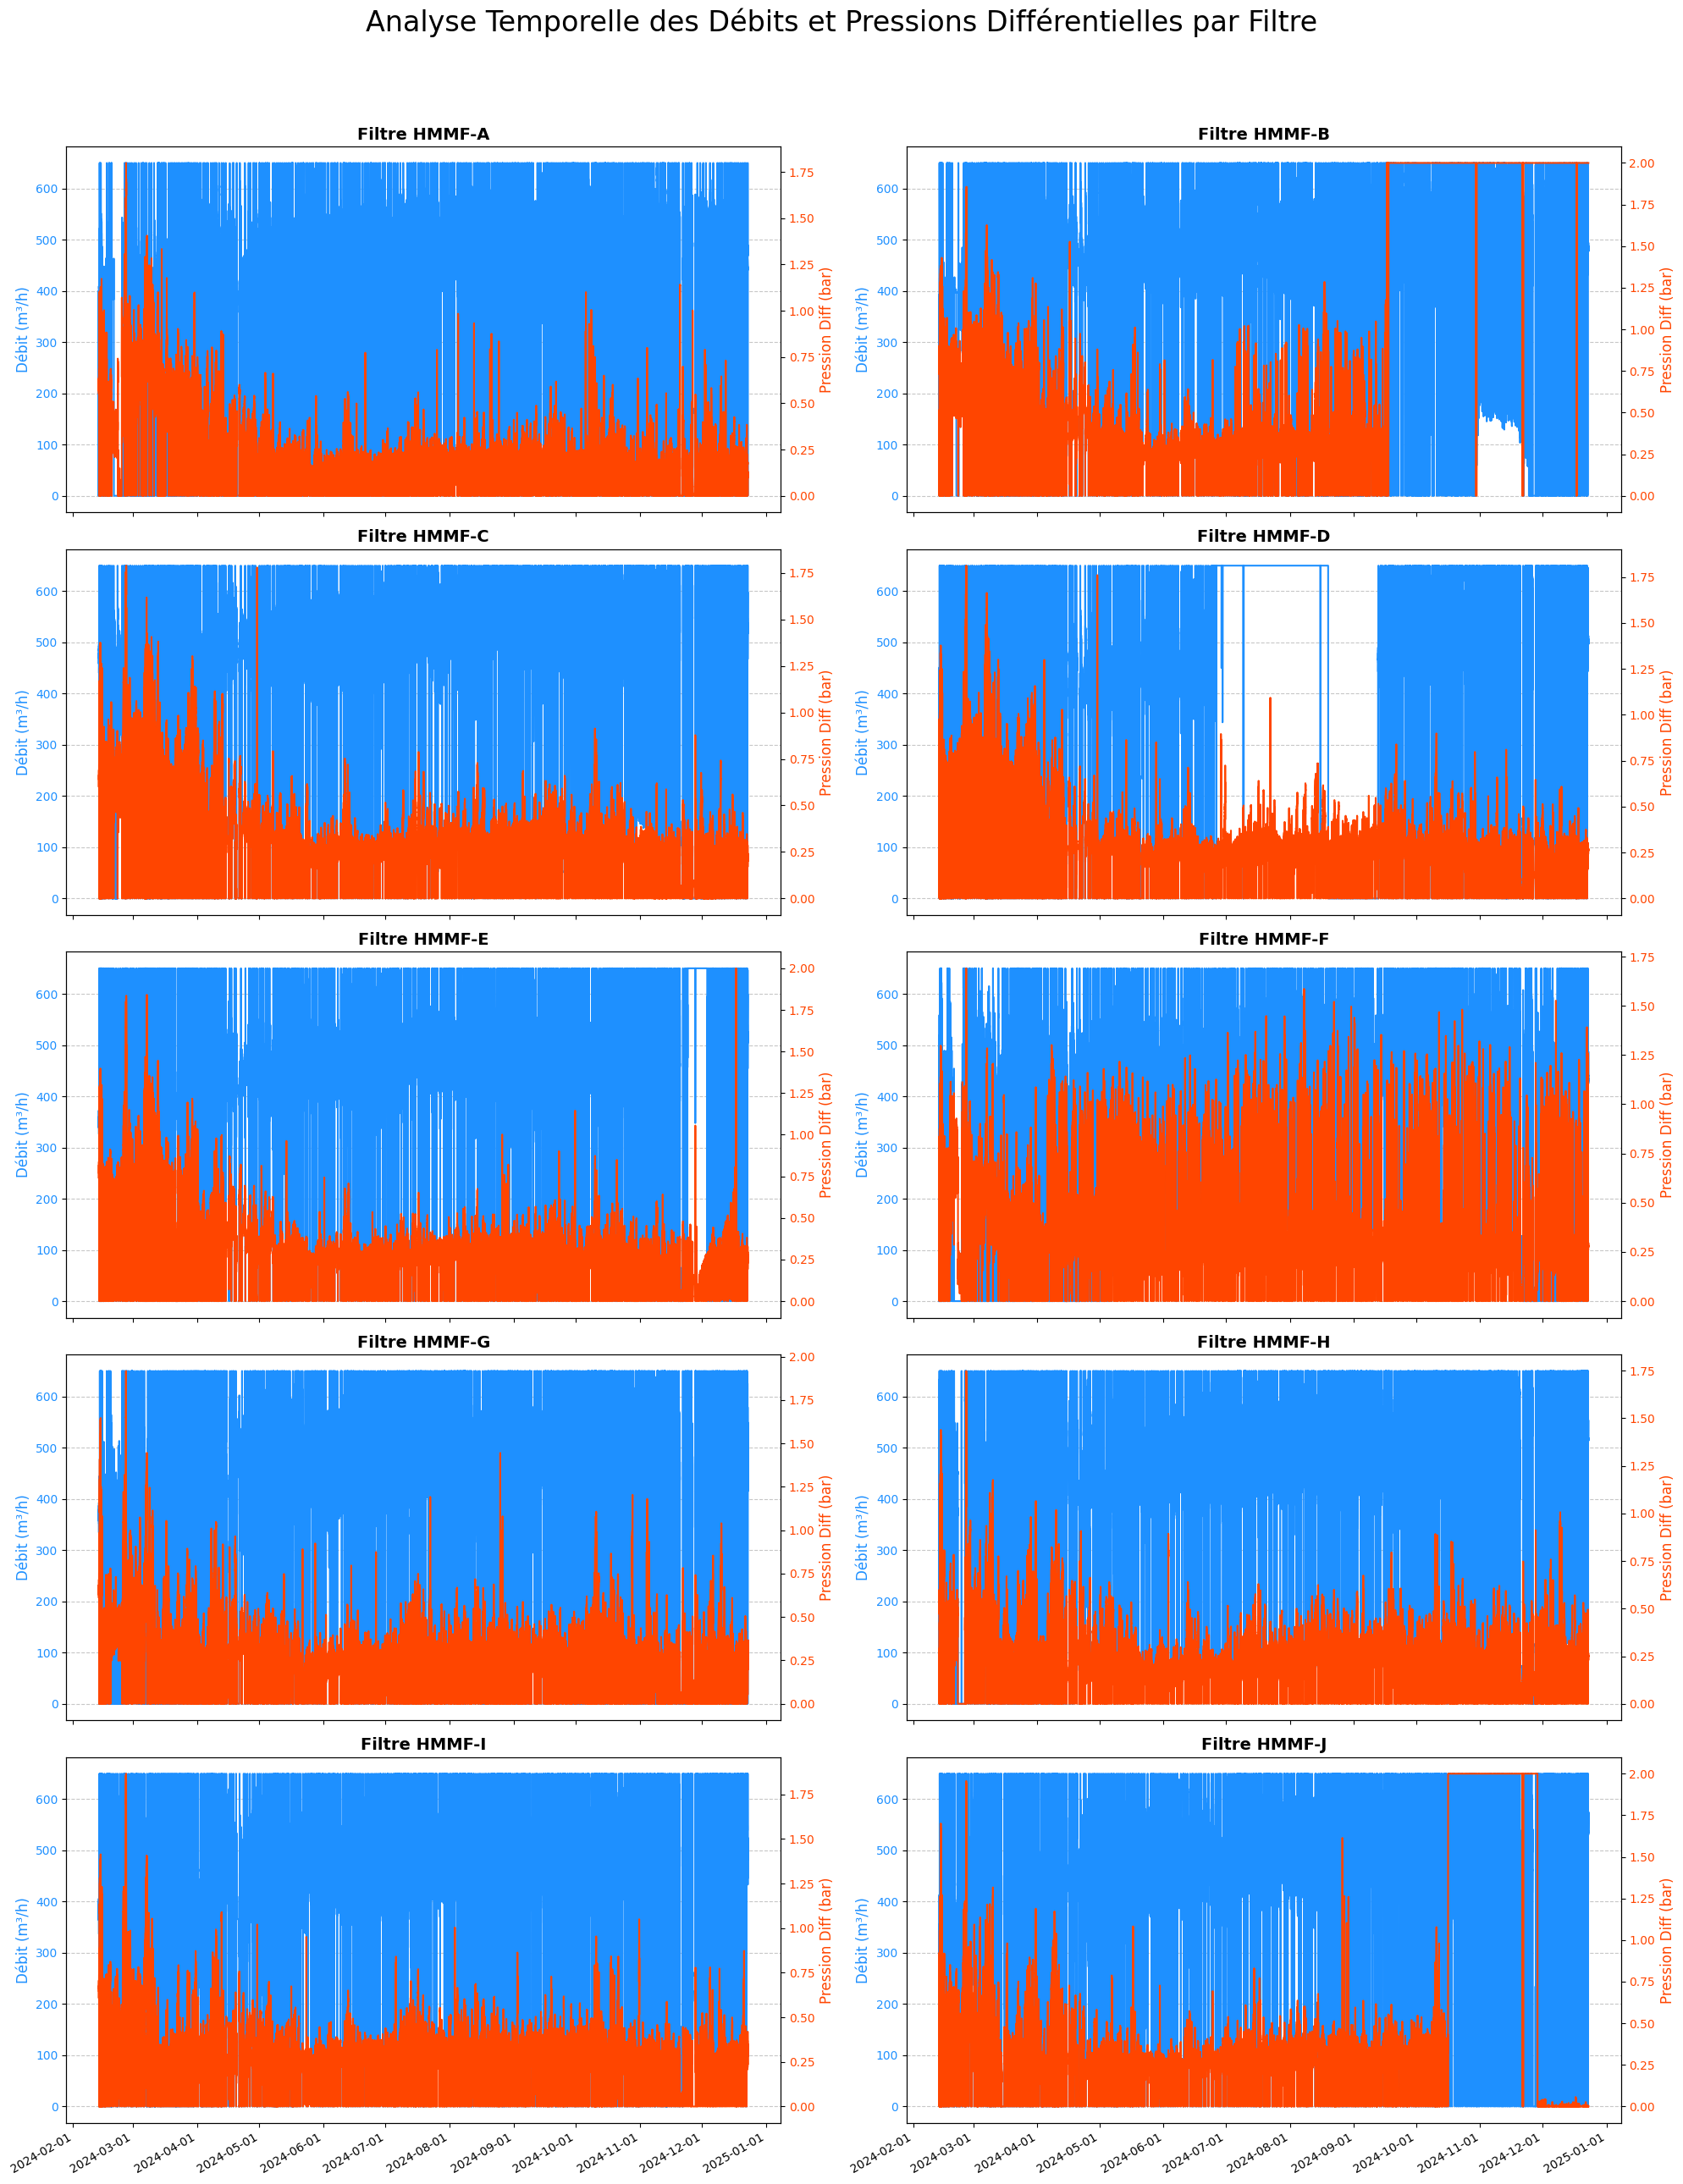

In [27]:
# --- Pré-requis : S'assurer que le DataFrame corrigé est disponible ---
if 'df_corrected' not in locals():
    print("❌ Erreur : Le DataFrame 'df_corrected' n'a pas été trouvé.")
    print("Veuillez d'abord exécuter le script de correction.")
else:
    print("--- Génération des graphiques pour les filtres HMMF (FIT vs PDIT) ---")

    # 1. Sélectionner et trier les paires de colonnes FIT et PDIT pour les filtres
    flow_cols = sorted([col for col in df_corrected.columns if col.startswith('FIT_001')])
    dp_cols   = sorted([col for col in df_corrected.columns if col.startswith('PDIT_001')])

    # 2. Définir la structure de la grille de sous-graphiques (5 lignes, 2 colonnes)
    n_filters = len(flow_cols)
    n_rows = 5
    n_cols = 2
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 25), sharex=True)

    # "Aplatir" le tableau d'axes pour pouvoir boucler dessus facilement
    axes = axes.flatten()

    # 3. Boucler sur chaque paire de filtres et tracer les graphiques
    for i, (flow_col, dp_col) in enumerate(zip(flow_cols, dp_cols)):
        ax = axes[i]

        # Extraire la lettre du filtre (A, B, C...) pour le titre
        filter_letter = flow_col.split('HMMF-')[-1]

        # --- Tracer le Débit (FIT) sur l'axe Y de gauche ---
        color_fit = 'dodgerblue'
        ax.plot(df_corrected.index, df_corrected[flow_col], color=color_fit, label=f'Débit (FIT) - HMMF-{filter_letter}')
        ax.set_ylabel('Débit (m³/h)', color=color_fit, fontsize=12)
        ax.tick_params(axis='y', labelcolor=color_fit)
        ax.grid(axis='y', linestyle='--', alpha=0.7)

        # --- Créer un axe Y secondaire qui partage le même axe X (temps) ---
        ax2 = ax.twinx()

        # --- Tracer la Pression Différentielle (PDIT) sur l'axe Y de droite ---
        color_pdit = 'orangered'
        ax2.plot(df_corrected.index, df_corrected[dp_col], color=color_pdit, label=f'Pression Diff (PDIT) - HMMF-{filter_letter}')
        ax2.set_ylabel('Pression Diff (bar)', color=color_pdit, fontsize=12)
        ax2.tick_params(axis='y', labelcolor=color_pdit)

        # Mettre en forme l'axe X (dates)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

        ax.set_title(f"Filtre HMMF-{filter_letter}", fontsize=14, weight='bold')

    # 4. Masquer les axes vides s'il y en a
    for j in range(n_filters, len(axes)):
        axes[j].set_visible(False)

    # 5. Ajouter un titre général et ajuster la mise en page
    fig.suptitle('Analyse Temporelle des Débits et Pressions Différentielles par Filtre', fontsize=24, y=1.03)
    fig.tight_layout()
    plt.show()

# 🔍 Analyse des Runs de Zéros dans le Niveau du Réservoir

### 🎯 Objectif
- Identifier les périodes où le capteur du niveau de réservoir (`LIT_002_FILTER_WATER_STG_TNK`) indique zéro.
- Différencier les **arrêts système normaux** (tous les FIT à zéro) des **anomalies potentielles** (FIT non nuls pendant les zéros).

### 🛠 Méthodologie
1. Détecter toutes les séquences de zéros (`runs`) dans la série temporelle.
2. Convertir les séquences en DataFrame avec :
   - Heure de début (`start_time`)
   - Heure de fin (`end_time`)
   - Longueur du run (`run_length`)
3. Filtrer les runs correspondant à des arrêts système globaux.
4. Séparer les runs restants en :
   - **Runs courts** : suspicion de défaut ponctuel du capteur
   - **Runs longs** : suspicion d'anomalie plus persistante
5. Ajouter le contexte immédiat avant et après chaque run pour faciliter l'analyse.

### 🔍 Résultats attendus
- Tableau des runs courts et longs suspectés d'anomalies.
- Possibilité de détecter des défauts de capteur ou des incohérences dans les données de niveau du réservoir.
"""))


In [33]:
# --- Pré-requis : S'assurer que le DataFrame est bien chargé et indexé par le temps ---
if 'df_pre_traitement' not in locals():
    print("❌ Erreur : Le DataFrame 'df_pre_traitement' n'est pas défini.")
else:
    col = 'LIT_002_FILTER_WATER_STG_TNK'
    series = df_pre_traitement[col]

    # --- 1️⃣ & 2️⃣ : Identifier les runs de zéros (inchangé) ---
    s = (series == 0).astype(int)
    runs = (s != s.shift()).cumsum()

    runs_df = pd.DataFrame({'val': s, 'run': runs}, index=df_pre_traitement.index)

    # =========================================================================
    # === CORRECTION APPLIQUÉE ICI pour éviter le FutureWarning ===
    # =========================================================================
    # Isoler les runs de zéros
    zero_runs_df = runs_df[runs_df['val'] == 1]

    # Transformer temporairement l'index en une colonne 'time'
    zero_runs_temp = zero_runs_df.reset_index().rename(columns={'index': 'time'})

    # Utiliser .agg() pour des performances optimales et sans warning
    zero_runs_all = zero_runs_temp.groupby('run').agg(
        start_time=('time', 'min'),
        end_time=('time', 'max'),
        run_length=('time', 'count')
    ).reset_index()
    # =========================================================================

    # Le reste du code est identique...

    # --- Filtrage des arrêts système globaux ---
    print("--- Filtrage des arrêts système globaux ---")
    activity_indicator_cols = [c for c in df_pre_traitement.columns if c.startswith('FIT_001')]
    runs_to_keep = []

    for idx, row in zero_runs_all.iterrows():
        run_period_df = df_pre_traitement.loc[row['start_time']:row['end_time']]
        activity_sum = run_period_df[activity_indicator_cols].sum().sum()
        if activity_sum > 1:
            runs_to_keep.append(row['run'])

    zero_runs = zero_runs_all[zero_runs_all['run'].isin(runs_to_keep)].copy()

    print(f"{len(zero_runs_all) - len(zero_runs)} runs de zéros ont été identifiés comme des arrêts système et ignorés.")
    print(f"{len(zero_runs)} runs de zéros suspects (anomalies potentielles) seront analysés.")

    if not zero_runs.empty:
        # --- Analyser les runs restants ---
        mean_run_len = zero_runs['run_length'].mean()
        short_zero_runs = zero_runs[zero_runs['run_length'] < mean_run_len].reset_index(drop=True)
        long_zero_runs = zero_runs[zero_runs['run_length'] > mean_run_len].reset_index(drop=True)

        short_zero_runs_tri = short_zero_runs.sort_values(by='run_length', ascending=True).reset_index(drop=True)
        long_zero_runs_tri = long_zero_runs.sort_values(by='run_length', ascending=True).reset_index(drop=True)

        # --- Fonction pour ajouter le contexte ---
        def add_before_after(series_indexed, zero_runs_df):
            val_before, val_after = [], []
            for idx, row in zero_runs_df.iterrows():
                pos_start = series_indexed.index.get_loc(row['start_time'])
                pos_end = series_indexed.index.get_loc(row['end_time'])
                val_before.append(series_indexed.iloc[pos_start-1] if pos_start > 0 else None)
                val_after.append(series_indexed.iloc[pos_end+1] if pos_end < len(series_indexed)-1 else None)
            zero_runs_df['val_before'] = val_before
            zero_runs_df['val_after'] = val_after
            return zero_runs_df

        short_zero_runs_tri = add_before_after(series, short_zero_runs_tri)
        long_zero_runs_tri = add_before_after(series, long_zero_runs_tri)

        # --- Affichage ---
        colonnes_a_afficher = ['run', 'start_time', 'end_time', 'run_length', 'val_before', 'val_after']
        print("\n--- Analyse des runs de zéros COURTS et SUSPECTS ---")
        display(short_zero_runs_tri[colonnes_a_afficher])
        print("\n--- Analyse des runs de zéros LONGS et SUSPECTS ---")
        display(long_zero_runs_tri[colonnes_a_afficher])
    else:
        print("\n✅ Aucune anomalie de capteur (LIT=0 avec activité système) n'a été trouvée.")

--- Filtrage des arrêts système globaux ---
48 runs de zéros ont été identifiés comme des arrêts système et ignorés.
4 runs de zéros suspects (anomalies potentielles) seront analysés.

--- Analyse des runs de zéros COURTS et SUSPECTS ---


,run,start_time,end_time,run_length,val_before,val_after
0,90,2024-08-28 11:14:00,2024-08-28 11:14:00,1,51.6525,70.000000
1,92,2024-08-28 11:39:00,2024-08-28 11:40:00,2,70.0000,99.931252



--- Analyse des runs de zéros LONGS et SUSPECTS ---


,run,start_time,end_time,run_length,val_before,val_after
0,96,2024-10-25 19:00:00,2024-10-26 06:59:00,720,76.831253,86.824997
1,98,2024-11-20 11:57:00,2024-11-21 17:39:00,1783,20.006250,21.337500


# 💧 Correction des Runs Courts de Zéros dans le Niveau du Réservoir

### 🎯 Objectif
- Corriger les petites séquences de zéros (`runs courts`) dans la colonne `LIT_002_FILTER_WATER_STG_TNK`.
- Ces zéros courts sont souvent dus à des **défauts temporaires du capteur** et non à de vrais arrêts du système.

### 🛠 Méthodologie
1. Identifier les runs courts dans la série temporelle après avoir filtré les arrêts système globaux.
2. Ajouter le contexte immédiat avant et après chaque run (valeurs précédentes et suivantes).
3. Corriger chaque run court en remplaçant les zéros par la **moyenne des valeurs avant et après**.
4. Visualiser la série :
   - ✅ **Avant correction** : les zéros sont indiqués en rouge.
   - ✅ **Après correction** : les zéros corrigés apparaissent en vert, les zéros restants (longs runs) en orange.

### 🔍 Résultat attendu
- Une série temporelle plus cohérente pour le niveau de réservoir.
- Les anomalies dues aux capteurs sont corrigées, facilitant les analyses futures.
"""))



--- Correction de 2 runs de zéros courts... ---
✅ Correction terminée.

--- Génération des graphiques de comparaison ---


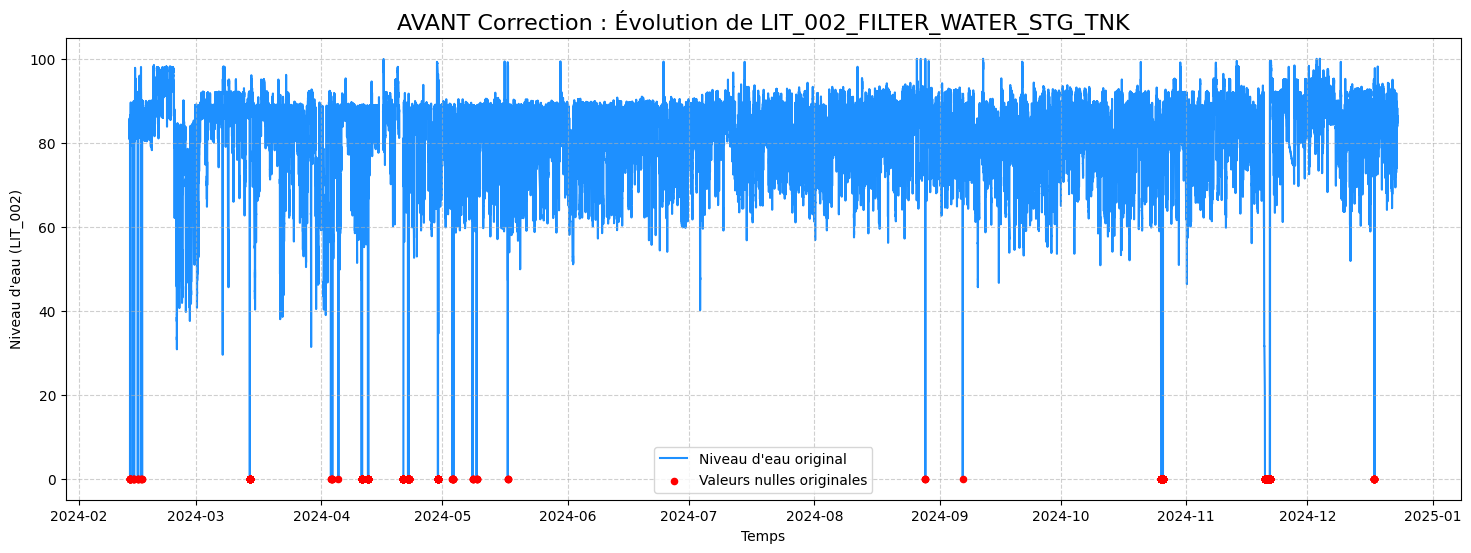

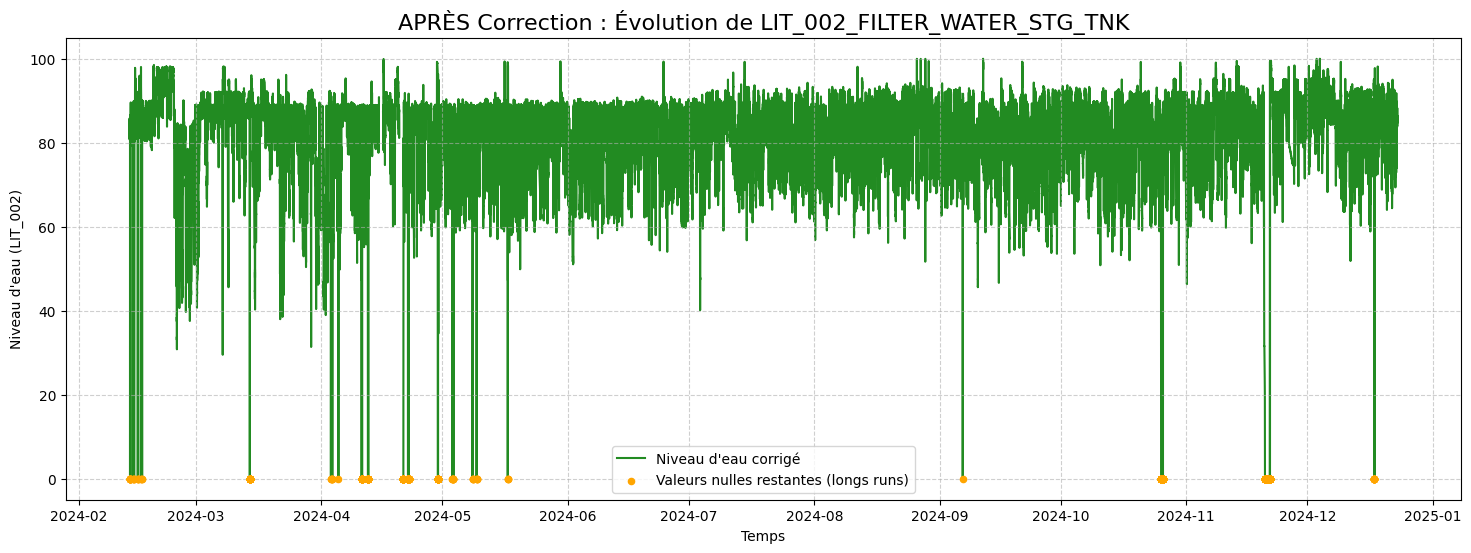

In [34]:
# --- Pré-requis ---
if 'df_pre_traitement' not in locals():
    print("❌ Erreur : Le DataFrame 'df_pre_traitement' n'est pas défini.")
else:
    col = 'LIT_002_FILTER_WATER_STG_TNK'

    # =========================================================================
    # === PARTIE 1 : Identification des runs courts (votre code, légèrement adapté) ===
    # =========================================================================

    series = df_pre_traitement[col]
    s = (series == 0).astype(int)
    runs = (s != s.shift()).cumsum()
    runs_df = pd.DataFrame({'val': s, 'run': runs}, index=df_pre_traitement.index)

    zero_runs_df = runs_df[runs_df['val'] == 1]
    zero_runs_temp = zero_runs_df.reset_index().rename(columns={'index': 'time'})
    zero_runs_all = zero_runs_temp.groupby('run').agg(
        start_time=('time', 'min'), end_time=('time', 'max'), run_length=('time', 'count')
    ).reset_index()

    activity_indicator_cols = [c for c in df_pre_traitement.columns if c.startswith('FIT_001')]
    runs_to_keep = []
    for idx, row in zero_runs_all.iterrows():
        activity_sum = df_pre_traitement.loc[row['start_time']:row['end_time'], activity_indicator_cols].sum().sum()
        if activity_sum > 1:
            runs_to_keep.append(row['run'])

    zero_runs = zero_runs_all[zero_runs_all['run'].isin(runs_to_keep)].copy()

    if not zero_runs.empty:
        mean_run_len = zero_runs['run_length'].mean()
        short_zero_runs = zero_runs[zero_runs['run_length'] < mean_run_len].reset_index(drop=True)
        short_zero_runs_tri = short_zero_runs.sort_values(by='run_length', ascending=True).reset_index(drop=True)

        def add_before_after(series_indexed, zero_runs_df):
            val_before, val_after = [], []
            for idx, row in zero_runs_df.iterrows():
                pos_start = series_indexed.index.get_loc(row['start_time'])
                pos_end = series_indexed.index.get_loc(row['end_time'])
                val_before.append(series_indexed.iloc[pos_start-1] if pos_start > 0 else None)
                val_after.append(series_indexed.iloc[pos_end+1] if pos_end < len(series_indexed)-1 else None)
            zero_runs_df['val_before'] = val_before
            zero_runs_df['val_after'] = val_after
            return zero_runs_df

        short_zero_runs_tri = add_before_after(series, short_zero_runs_tri)

        # =========================================================================
        # === PARTIE 2 : Correction des runs courts (votre fonction, corrigée) ===
        # =========================================================================

        # --- Fonction de correction (CORRIGÉE pour utiliser l'index) ---
        def corriger_runs_courts(series_a_corriger, runs_df_a_corriger):
            series_corr = series_a_corriger.copy()
            for idx, row in runs_df_a_corriger.iterrows():
                start_time, end_time = row['start_time'], row['end_time']
                val_before, val_after = row['val_before'], row['val_after']

                if pd.isna(val_before) or pd.isna(val_after): continue

                replacement = (val_before + val_after) / 2

                # CORRECTION : Utiliser l'index pour le masque de sélection
                mask = (series_corr.index >= start_time) & (series_corr.index <= end_time)
                series_corr.loc[mask] = replacement

            return series_corr

        # Appliquer la correction
        print(f"\n--- Correction de {len(short_zero_runs_tri)} runs de zéros courts... ---")
        series_corrigee = corriger_runs_courts(series, short_zero_runs_tri)

        # Remplacer la colonne dans le DataFrame principal (sur une copie pour la visualisation)
        df_visu = df_pre_traitement.copy()
        df_visu[col] = series_corrigee
        print("✅ Correction terminée.")

        # =========================================================================
        # === PARTIE 3 : Visualisation (votre code, corrigé) ===
        # =========================================================================

        print("\n--- Génération des graphiques de comparaison ---")

        # --- Graphique 1 : AVANT correction ---
        plt.figure(figsize=(18, 6))
        plt.plot(df_pre_traitement.index, df_pre_traitement[col], label='Niveau d\'eau original', color='dodgerblue', zorder=1)
        # CORRECTION : Utiliser l'index pour le scatter plot
        zeros_avant = df_pre_traitement[col] == 0
        plt.scatter(df_pre_traitement.index[zeros_avant], df_pre_traitement.loc[zeros_avant, col],
                    color='red', s=20, label='Valeurs nulles originales', zorder=2)
        plt.title(f"AVANT Correction : Évolution de {col}", fontsize=16)
        plt.xlabel("Temps")
        plt.ylabel("Niveau d'eau (LIT_002)")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

        # --- Graphique 2 : APRÈS correction ---
        plt.figure(figsize=(18, 6))
        plt.plot(df_visu.index, df_visu[col], label='Niveau d\'eau corrigé', color='forestgreen', zorder=1)
        # CORRECTION : Utiliser l'index pour le scatter plot
        zeros_apres = df_visu[col] == 0
        plt.scatter(df_visu.index[zeros_apres], df_visu.loc[zeros_apres, col],
                    color='orange', s=20, label='Valeurs nulles restantes (longs runs)', zorder=2)
        plt.title(f"APRÈS Correction : Évolution de {col}", fontsize=16)
        plt.xlabel("Temps")
        plt.ylabel("Niveau d'eau (LIT_002)")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

    else:
        print("\n✅ Aucune anomalie de capteur (LIT=0 avec activité système) n'a été trouvée.")